In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [18]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
# dropping ID column as its not needed
df = df.drop('ID',axis=1)

In [20]:
# 5 point summary
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [22]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


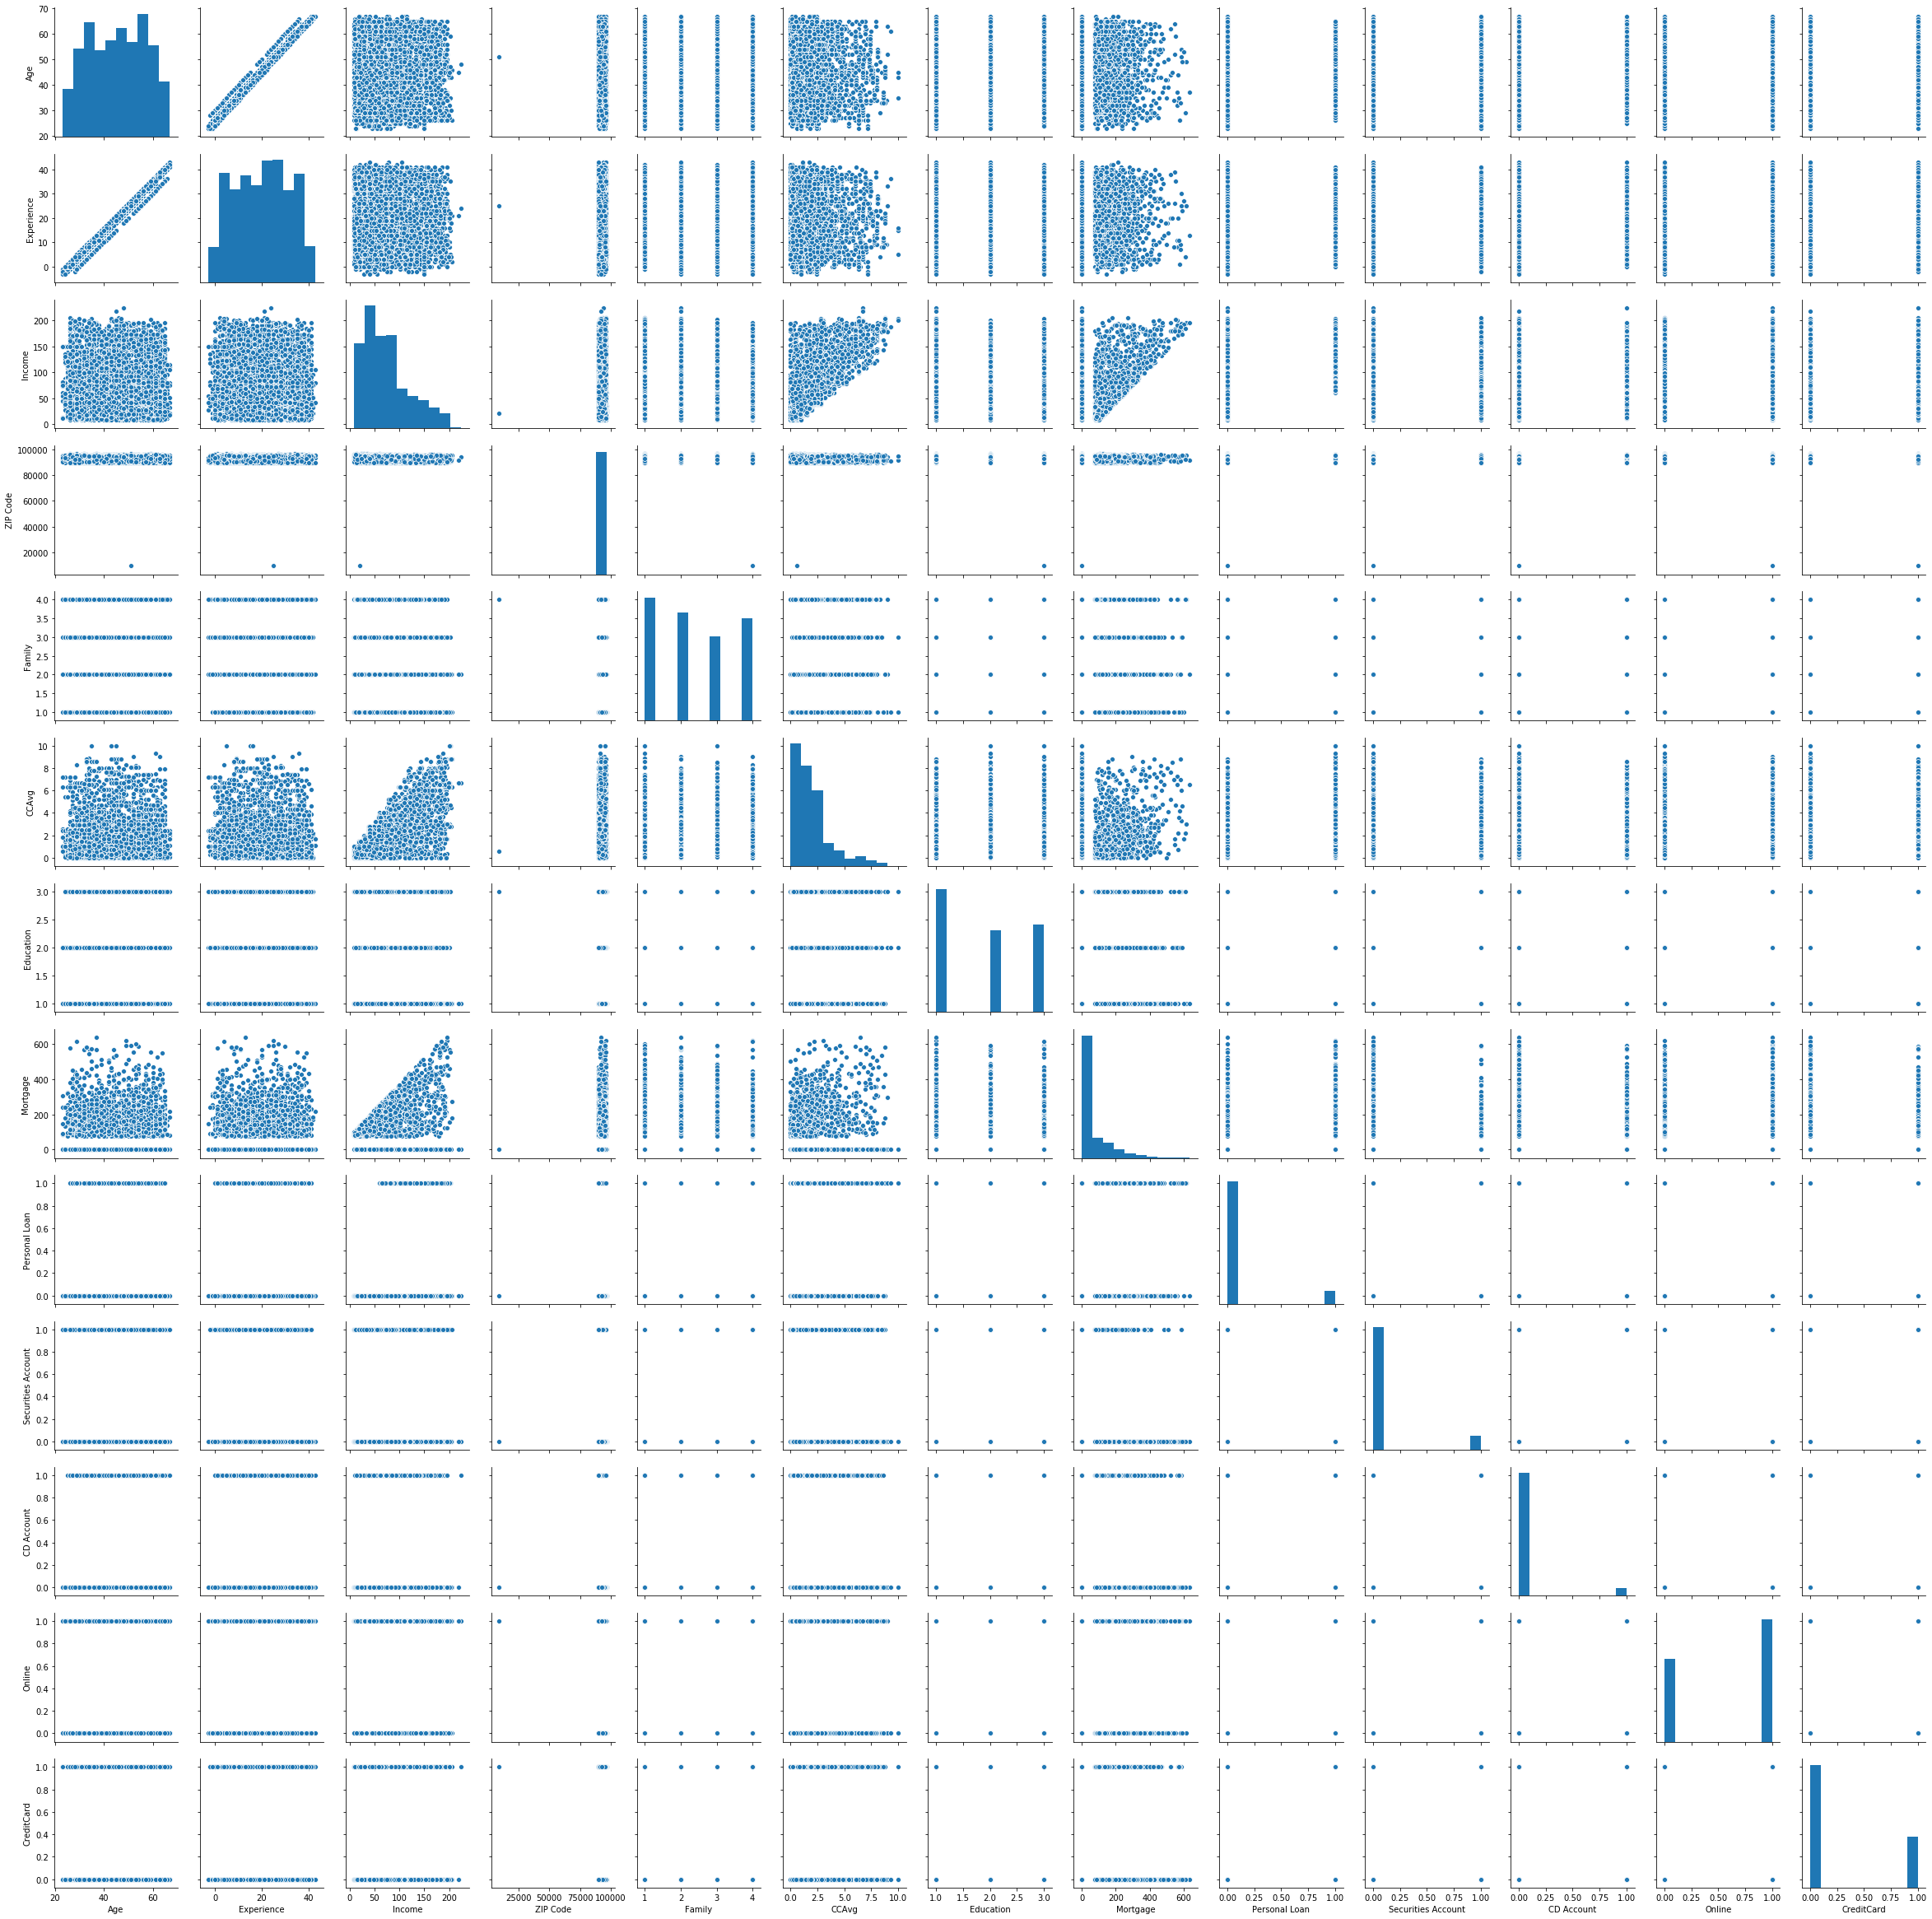

In [23]:
sns.pairplot(df)

In [24]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

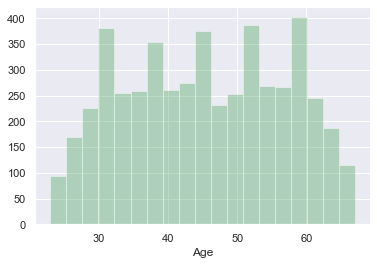

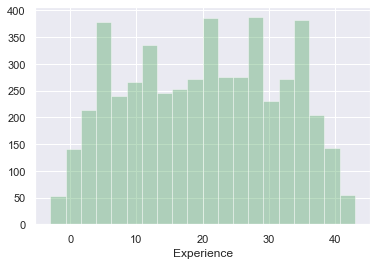

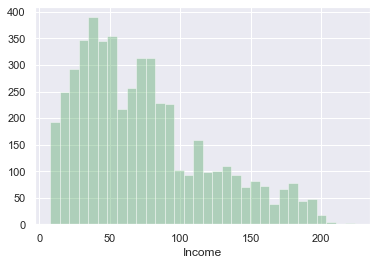

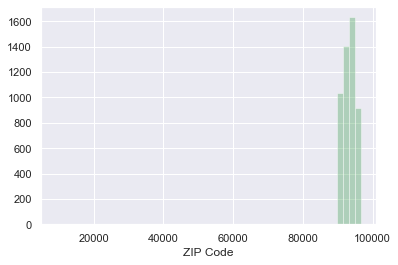

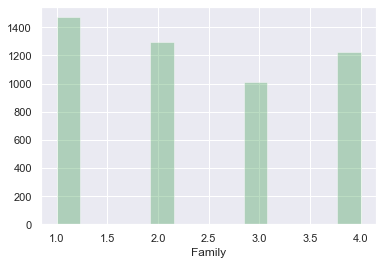

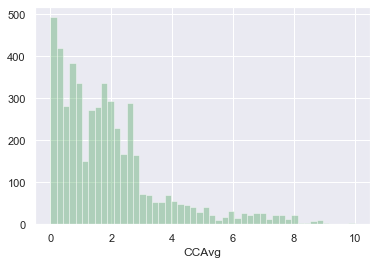

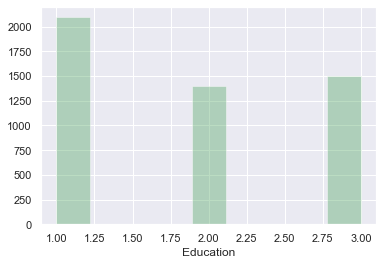

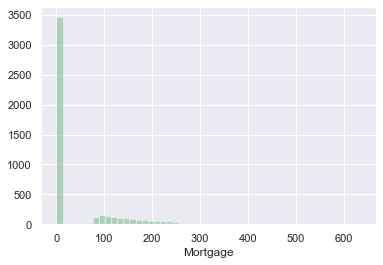

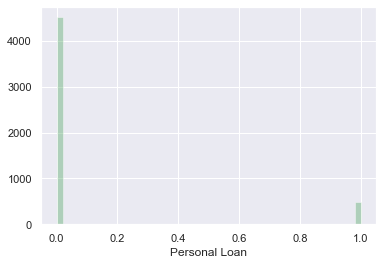

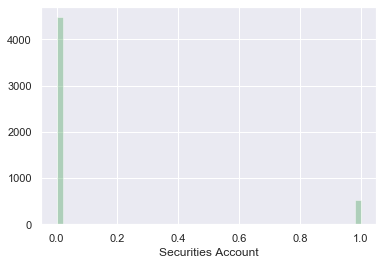

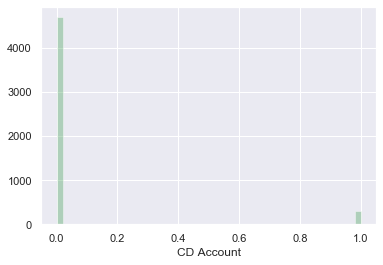

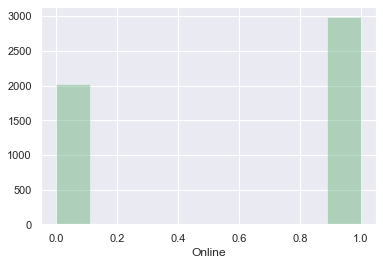

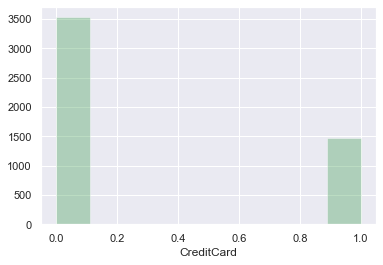

In [30]:
for col in df.columns:
    sns.distplot(df[col], color='g', kde=False, hue=)
    plt.show()

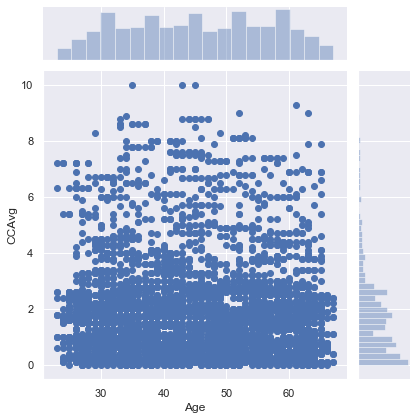

In [31]:
sns.jointplot(x='Age', y='CCAvg', data=df)

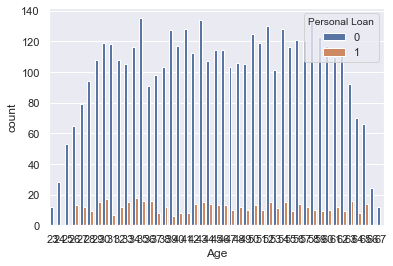

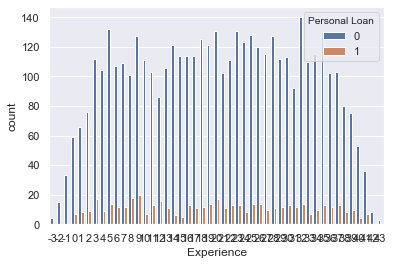

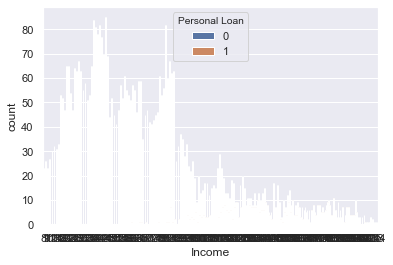

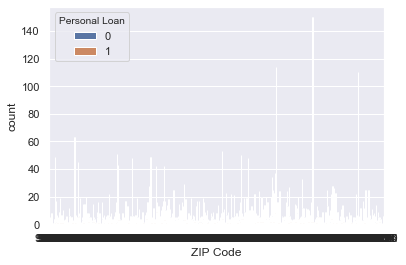

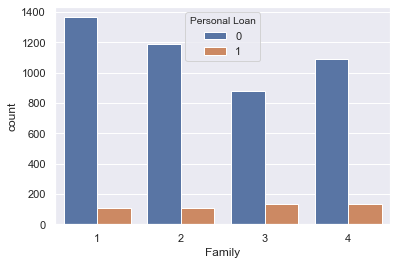

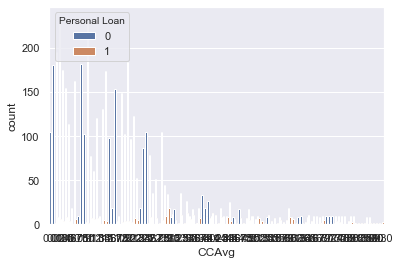

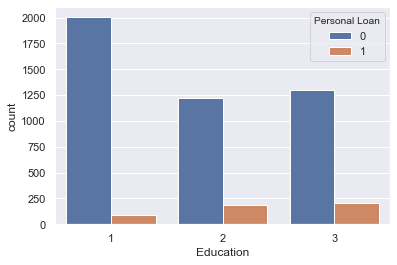

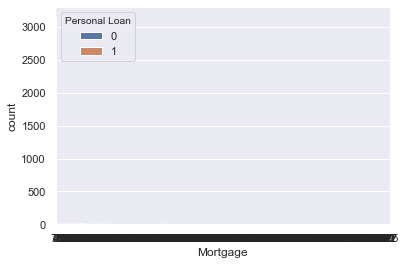

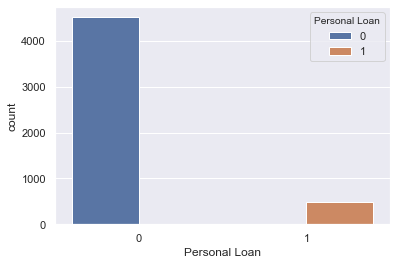

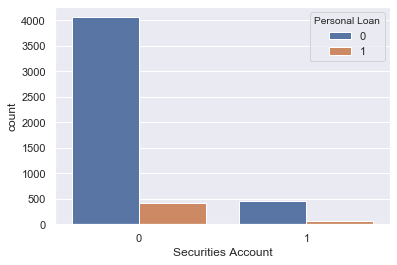

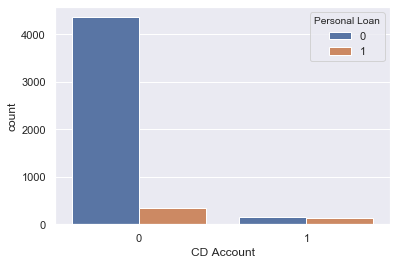

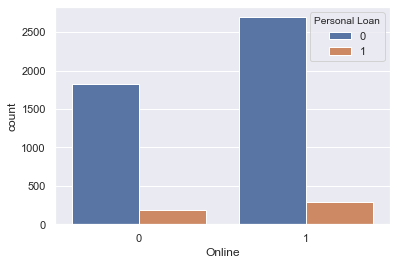

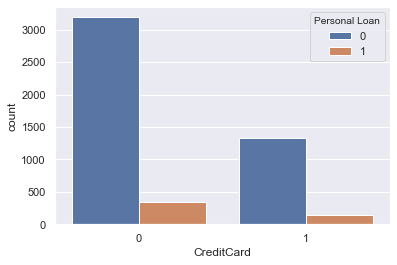

In [40]:
for col in df.columns:
    sns.countplot(df[col], hue=df['Personal Loan'])
    plt.show()

In [41]:
# Observations
# 1. Small family size has accepted less loan. As family size increase, we can see slight rise in the increase of loan accepted
# 2. Undergraduates have not accepted loans. But we can see that, in Graduates and Professionals there is increase in the acceptance of loan and decrease in not accepting the loan
# 3. If customer has securities account, then there is significant drop in the acceptance of loan
# 4. If customer has certificate of deposit, then there is significant drop in the acceptance of loan
# 5. If customer uses internet banking, then there is slight increase in the amount of people accepting loan and not accepting loan
# 6. If customer is using creadit card, then the loan accepted rate is less compared to that of customers not using credit card

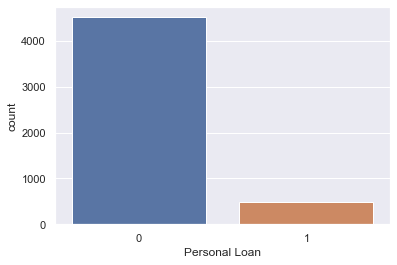

In [35]:
sns.countplot(df['Personal Loan'])

In [36]:
# We can see that amount of people who have accepted loan in the last campaign is comparitively less than that
# of those who have not accepted the loan

### KNN

In [42]:
from sklearn.model_selection import train_test_split

In [53]:
df.head()
X = np.array(df.drop('Personal Loan',axis=1))
y = np.array(df['Personal Loan'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size=0.30)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
y_pred = knn.predict(X_test)

In [62]:
knn.score(X_test, y_test)

0.8953333333333333

In [63]:
accuracy_score(y_pred, y_test)

0.8953333333333333

In [69]:
neighbors = list(range(1,20,2))
accuracy_scores = []

In [70]:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    accuracy_scores.append(scores)

In [71]:
accuracy_scores

[0.8806666666666667,
 0.8913333333333333,
 0.8953333333333333,
 0.894,
 0.8973333333333333,
 0.896,
 0.9006666666666666,
 0.9026666666666666,
 0.898,
 0.9013333333333333]

In [90]:
# Misclassification errors
MSE = [1- x for x in accuracy_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("Optimal number of neighbor is {} and model accuracy is {}%".format(optimal_k, accuracy_scores[MSE.index(min(MSE))] * 100))

Optimal number of neighbor is 15 and model accuracy is 90.26666666666667%


In [82]:
knn = KNeighborsClassifier(optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1345,    9],
       [ 137,    9]])

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logistic_regression = LogisticRegression(solver='lbfgs')

In [85]:
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred)

0.912

In [87]:
logistic_regression.score(X_test, y_test)

0.912

In [89]:
print("Logistic regression accuracy is {}%".format(accuracy_score(y_test, y_pred) * 100))

Logistic regression accuracy is 91.2%


In [91]:
confusion_matrix(y_test, y_pred)

array([[1323,   31],
       [ 101,   45]])

### Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
y_pred = naive_bayes.predict(X_test)

In [103]:
print("Logistic Regression model accuracy is {}%".format(accuracy_score(y_test, y_pred)*100))

Logistic Regression model accuracy is 88.13333333333333%


In [96]:
confusion_matrix(y_test, y_pred)

array([[1246,  108],
       [  70,   76]])

### Conclusions

In [104]:
# With regards to the model accuracy we can see that, KNN performs well with number of neighbors = 15
# On studying the confusion matrix, we see that KNN has high false positive and low false negative number.
# The false negative rate of Naive Bayes and Logistic regression is high than that of KNN. 
# Hence, for this data set we can rely more on KNN predictions rather than the other two.
